##### QMenuBar、QMenu、QAction 視窗選單
QMenuBar、QMenu 和 QAction 是 PyQt5 裡的選單元件 ( 視窗最上方的選單 )，這篇教學會介紹如何在 PyQt5 視窗裡加入 選單元件，並實作點擊選單後的基本動作。

##### QMenuBar、QMenu 和 QAction 的差別 
QMenuBar、QMenu 和 QAction 都是 PyQt5 的選單元件，三個的差別如下：
* QMenuBar：選單主元件，通常一個視窗只會有一個。
* QMenu：選單中帶有「子選項」的選項。
* QAction：選單中的選項。

##### 建立視窗選單 
建立 PyQt5 視窗物件後，先透過 QtWidgets.QMenuBar(widget) 方法建立 QMenuBar 視窗選單，\
接著就能使用 QtWidgets.QMenu(str) 建立帶有「子選項」的選項，使用 QtWidgets.QAction(str) 建立單一選項，\
建立 QAction 或 QMenu 後，可以將其加入 QMenu，而 QMenuBar 只能加入 QMenu。

下方的程式碼執行後，會在建立一個具有一個 File 下拉選單的 QMenuBar，File 下拉選單中有 Open 和 Close 兩個選項。

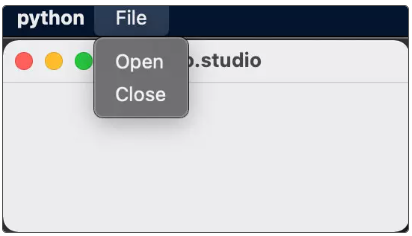

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

menubar = QtWidgets.QMenuBar(Form)         # 建立 menubar

menu_file = QtWidgets.QMenu('File')        # 建立一個 File 選項 ( QMenu )

action_open = QtWidgets.QAction('Open')    # 建立一個 Open 選項 ( QAction )
menu_file.addAction(action_open)           # 將 Open 選項放入 File 選項裡

action_close = QtWidgets.QAction('Close')  # 建立一個 Close 選項 ( QAction )
menu_file.addAction(action_close)          # 將 Close 選項放入 File 選項裡

menubar.addMenu(menu_file)                 # 將 File 選項放入 menubar 裡

Form.show()
sys.exit(app.exec_())

除了使用 addAction() 方法可以加入單一選項，也可以使用 addActions() 的方法，一次加入以串列組成的多個選項，\
下方的程式碼執行後，會在原本的選單後方加入第二層選單，第二個選單使用 addActions() 添加選項。

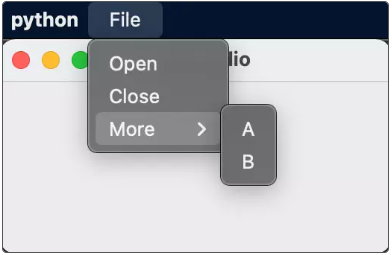

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

menubar = QtWidgets.QMenuBar(Form)

menu_file = QtWidgets.QMenu('File')

action_open = QtWidgets.QAction('Open')
menu_file.addAction(action_open)

action_close = QtWidgets.QAction('Close')
menu_file.addAction(action_close)

menu_sub = QtWidgets.QMenu('More')          # 建立 More 選項 ( QMenu )
action_A = QtWidgets.QAction('A')           # 建立 A 選項 ( QAction )
action_B = QtWidgets.QAction('B')           # 建立 B 選項 ( QAction )
menu_sub.addActions([action_A, action_B])   # More 選項中加入 A 和 B
menu_file.addMenu(menu_sub)                 # 將 More 選項放入 File 選項裡

menubar.addMenu(menu_file)
# menubar.addMenu(menu_sub) 第二種顯示方式，把這註解掉 menu_file.addMenu(menu_sub) 

Form.show()
sys.exit(app.exec_())

##### 加入分隔線 
選單的選項順序是按照加入的順序決定，因此在加入選項的過程中，可以使用 addSeparator() 方法在指定的位置加入分隔線。

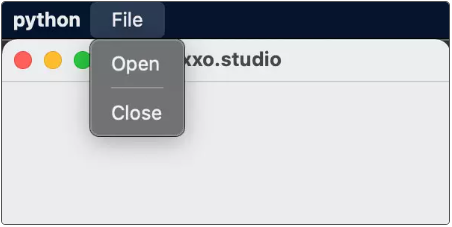

In [ ]:
from PyQt5 import QtWidgets
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

menubar = QtWidgets.QMenuBar(Form)

menu_file = QtWidgets.QMenu('File')

action_open = QtWidgets.QAction('Open')
menu_file.addAction(action_open)
menu_file.addSeparator()    # 加入分隔線

action_close = QtWidgets.QAction('Close')
menu_file.addAction(action_close)

menubar.addMenu(menu_file)

Form.show()
sys.exit(app.exec_())

##### 加入快捷鍵、Icon 圖示 
建立選項後，可以透過下列方法設定該選項的快捷鍵、Icon 圖示：

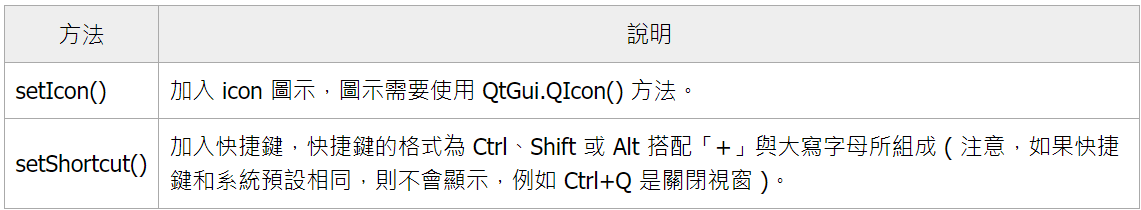

下方的程式碼執行後，會在兩個選項前方加上 icon，並加入快捷鍵的說明

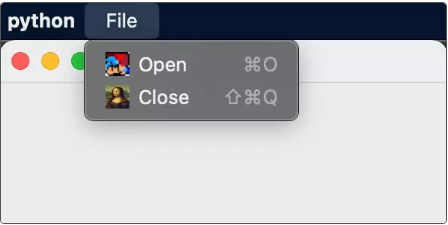

In [ ]:
from PyQt5 import QtWidgets, QtGui
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

menubar = QtWidgets.QMenuBar(Form)

menu_file = QtWidgets.QMenu('File')

action_open = QtWidgets.QAction('Open')
action_open.setIcon(QtGui.QIcon('Data\image\icon1.png'))
action_open.setShortcut('Ctrl+O')
menu_file.addAction(action_open)

action_close = QtWidgets.QAction('Close')
action_close.setIcon(QtGui.QIcon('Data\image\instagram2.jpg'))
action_close.setShortcut('Shift+Ctrl+Q')
menu_file.addAction(action_close)

menubar.addMenu(menu_file)

Form.show()
sys.exit(app.exec_())

##### 視窗選單點擊事件 
使用 triggered.connect(fn) 方法，就能在點擊選單的選項時，執行對應的函式，以下方的程式碼為例，點擊 open 選項時，會開啟選擇檔案的對話視窗，\
點擊 close 選項時會關閉整個視窗。

In [ ]:
from PyQt5 import QtWidgets, QtGui
import sys
app = QtWidgets.QApplication(sys.argv)

Form = QtWidgets.QWidget()
Form.setWindowTitle('oxxo.studio')
Form.resize(300, 200)

def open():
    filePath , filterType = QtWidgets.QFileDialog.getOpenFileNames()  # 選擇檔案對話視窗
    print(filePath , filterType)

def close():
    print('close')
    app.quit()

menubar = QtWidgets.QMenuBar(Form)

menu_file = QtWidgets.QMenu('File')

action_open = QtWidgets.QAction('Open')
action_open.triggered.connect(open)
menu_file.addAction(action_open)

action_close = QtWidgets.QAction('Close')
action_close.triggered.connect(close)
menu_file.addAction(action_close)

menubar.addMenu(menu_file)

Form.show()
sys.exit(app.exec_())

##### 改用 class 的寫法 
上方的程式碼，亦可改用 class 的寫法表示 ( 注意都要加上 self )。

In [ ]:
# 從 PyQt5 包中導入 QtWidgets 模組，這個模組提供了豐富的標準窗口組件。
from PyQt5 import QtWidgets
# 導入 sys 模組，用於處理從命令行傳入的參數以及程式的退出。
import sys

# 定義一個名為 MyWidget 的類，繼承自 QtWidgets.QWidget，是所有窗口類型的基類。
class MyWidget(QtWidgets.QWidget):
    # 類的初始化函數，當類被實例化時自動調用。
    def __init__(self):
        # 調用父類的初始化函數。
        super().__init__()
        # 設置窗口的標題。
        self.setWindowTitle('oxxo.studio')
        # 設置窗口的大小。
        self.resize(300, 200)
        # 調用 ui 方法來建立用戶界面。
        self.ui()

    # 定義 ui 方法，負責創建和組織界面元件。
    def ui(self):
        # 創建一個菜單欄。
        self.menubar = QtWidgets.QMenuBar(self)
        # 創建一個菜單。
        self.menu_file = QtWidgets.QMenu('File', self)
        
        # 創建一個菜單項目（動作），設定其標題為 'Open'。
        self.action_open = QtWidgets.QAction('Open', self)
        # 將菜單項目的 triggered 信號連接到 open 方法。
        self.action_open.triggered.connect(self.open)
        # 在 File 菜單中添加 Open 菜單項目。
        self.menu_file.addAction(self.action_open)

        # 創建另一個菜單項目，設定其標題為 'Close'。
        self.action_close = QtWidgets.QAction('Close', self)
        # 將菜單項目的 triggered 信號連接到 close 方法。
        self.action_close.triggered.connect(self.close)
        # 在 File 菜單中添加 Close 菜單項目。
        self.menu_file.addAction(self.action_close)

        # 在菜單欄中添加 File 菜單。
        self.menubar.addMenu(self.menu_file)

    # 定義 open 方法，用於打開文件。
    def open(self):
        # 使用檔案選擇對話框來選擇文件，返回選擇的文件路徑和文件類型。
        filePath, filterType = QtWidgets.QFileDialog.getOpenFileNames()
        # 打印選擇的文件路徑和類型。
        print(filePath, filterType)

    # 定義 close 方法，用於關閉應用程式。
    def close(self):
        # 輸出 'close' 到控制台。
        print('close')
        # 退出應用程式。
        app.quit()

# 檢查此腳本是否作為主程式運行。
if __name__ == '__main__':
    # 創建一個應用程式對象。
    app = QtWidgets.QApplication(sys.argv)
    # 實例化 MyWidget。
    Form = MyWidget()
    # 顯示窗口。
    Form.show()
    # 開始應用程式的事件循環，等待用戶操作，並在接收到退出信號時退出。
    sys.exit(app.exec_())